In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
os.getcwd()

'C:\\Users\\ooppa\\OneDrive\\文档'

In [3]:
df_train = pd.read_csv('train.csv', parse_dates=['date'])
print(df_train.shape)
df_train.head()

C:\Users\ooppa\Anaconda3\envs\tensorflow_windows\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(125497040, 6)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [4]:
df_train.columns[df_train.isnull().any()].tolist()

['onpromotion']

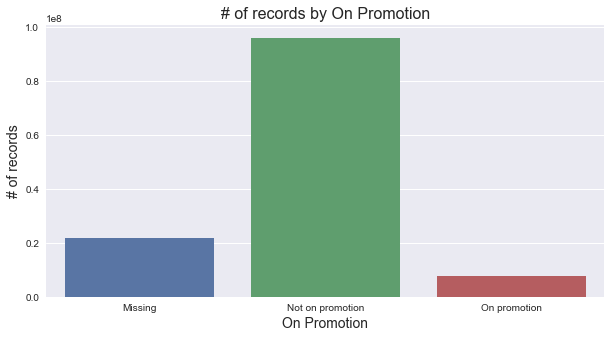

In [5]:
# Group the data by the "onpromotion" field. Make a count of the values and reset the index.
# reset_index converts the index created (the by parameter) back into a column
df_plot = df_train.fillna(-1).groupby(by=['onpromotion']).agg({'store_nbr':'count'}).reset_index()

# Replace the numeric values with text (for plot readability)
df_plot.onpromotion = df_plot.onpromotion.replace({0:'Not on promotion', 1:'On promotion', -1: 'Missing'})

# Set the plot size
plt.figure(figsize=(10,5))

# Create the barplot
sns.barplot(data=df_plot, x='onpromotion', y='store_nbr')

# Set the plot title
plt.title('# of records by On Promotion', fontsize=16)

# Set the axes labels
plt.xlabel('On Promotion', fontsize=14)
plt.ylabel('# of records', fontsize=14)

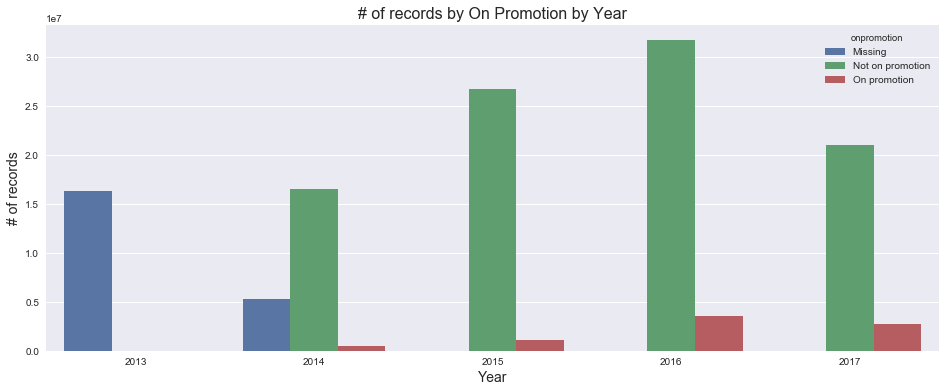

In [6]:
# Group the data by the "onpromotion" and date year fields. Make a count of the values and reset the index.
# reset_index converts the index created (the by parameter) back into a column
df_plot = df_train.fillna(-1).groupby(by=[df_train.date.dt.year, 'onpromotion']).agg({'store_nbr':'count'}).reset_index()

# Replace the numeric values with text (for plot readability)
df_plot.onpromotion = df_plot.onpromotion.replace({0:'Not on promotion', 1:'On promotion', -1: 'Missing'})

plt.figure(figsize=(16,6))
sns.barplot(data=df_plot, x='date', y='store_nbr', hue='onpromotion')
plt.title('# of records by On Promotion by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('# of records', fontsize=14)

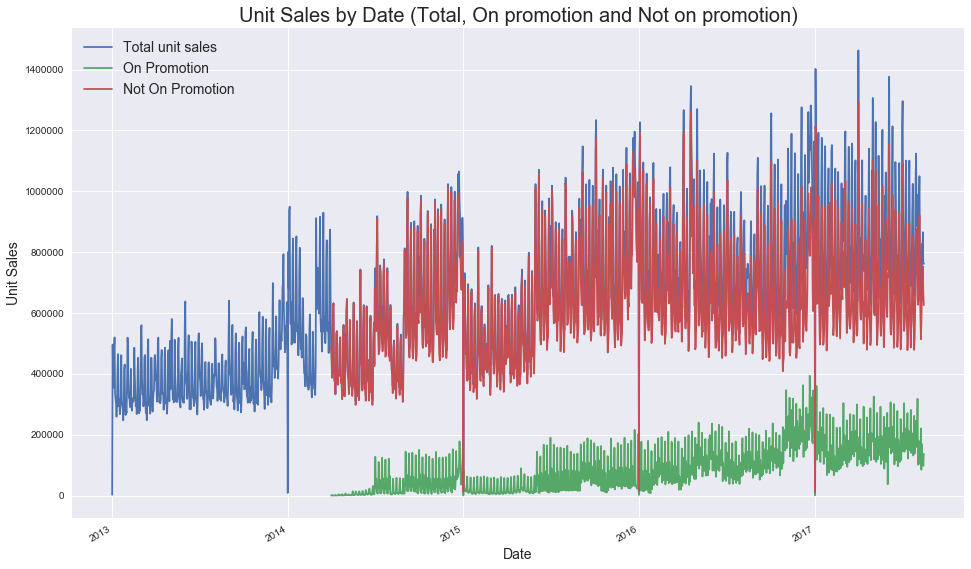

In [7]:
df_plot = df_train.groupby(by=['date']).agg({'unit_sales':'sum'}).reset_index()
# turn date into datetime type
df_plot.date = pd.to_datetime(df_plot.date)

# Unit Sales by Date
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
#Set the plot figure
fig.set_figheight(10)
fig.set_figwidth(16)
# Create the plot title
plt.title('Unit Sales by Date (Total, On promotion and Not on promotion)', fontsize=20)
# Plot total unit sales
plt.plot(df_plot.date, df_plot.unit_sales)

# plot unit sales on promotion
df_plot = df_train.loc[df_train['onpromotion'] == True].groupby(by=['date']).agg({'unit_sales':'sum'}).reset_index()
plt.plot(df_plot.date, df_plot.unit_sales)

# plot unit sales not on promotion
df_plot = df_train.loc[df_train['onpromotion'] == False].groupby(by=['date']).agg({'unit_sales':'sum'}).reset_index()
plt.plot(df_plot.date, df_plot.unit_sales)

# Set the legend
plt.legend(['Total unit sales','On Promotion','Not On Promotion'], fontsize=14)

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Unit Sales',fontsize=14)

In [8]:
df_stores = pd.read_csv('stores.csv')
print(df_stores.shape)
df_stores.head()

(54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
